In [ ]:
# GLOBAL IMPORTS
import pandas as pd
from src.config_file import PATH

# Load data
Water level data from [https://www.moezala.gov.mm/](https://www.moezala.gov.mm/) based on forecast.

Confirmed with news sources.

In [ ]:
# LOCAL IMPORTS
from script.plot_water import plot_water_level
from src.water_classification import classify_water_level

In [2]:
toungoo_df = pd.read_csv("data/Toungoo_waterlevel.csv", sep=",")
toungoo_df.head()

,Date,Rivers,Stations,Danger level (CM),Water level at (12:30) hr (cm),Water level changes during last (24) hr (cm),Water level forecast at next (24) hrs (cm),Remarks,Day,Water Level Classification
0,2024-09-08,Sittoung,Toungoo,600,564,-11,554,NaN,8,0
1,2024-09-09,Sittoung,Toungoo,600,549,-15,534,NaN,9,0
2,2024-09-10,Sittoung,Toungoo,600,552,3,562,NaN,10,0
3,2024-09-11,Sittoung,Toungoo,600,593,41,638,It may exceeded its above danger level during ...,11,0
4,2024-09-12,Sittoung,Toungoo,600,656,63,716,It may rise about 2 feet during the next 1 day...,12,1


In [4]:
x = 4  # Replace with your desired maximum classification value

min_level = toungoo_df["Water level at (12:30) hr (cm)"].min()
max_level = toungoo_df["Water level at (12:30) hr (cm)"].max()
danger_level = toungoo_df["Danger level (CM)"][0]

In [6]:
toungoo_df["Water Level Classification"] = toungoo_df[
    "Water level at (12:30) hr (cm)"
].apply(classify_water_level, args=(danger_level, max_level, x))

print(f"Min: {min_level}, Max: {max_level}")
print(toungoo_df[["Water level at (12:30) hr (cm)", "Water Level Classification"]])

Min: 527, Max: 805
    Water level at (12:30) hr (cm)  Water Level Classification
0                              564                           0
1                              549                           0
2                              552                           0
3                              593                           0
4                              656                           1
5                              735                           3
6                              805                           4
7                              774                           3
8                              744                           3
9                              726                           2
10                             716                           2
11                             710                           2
12                             700                           2
13                             698                           2
14                             692  

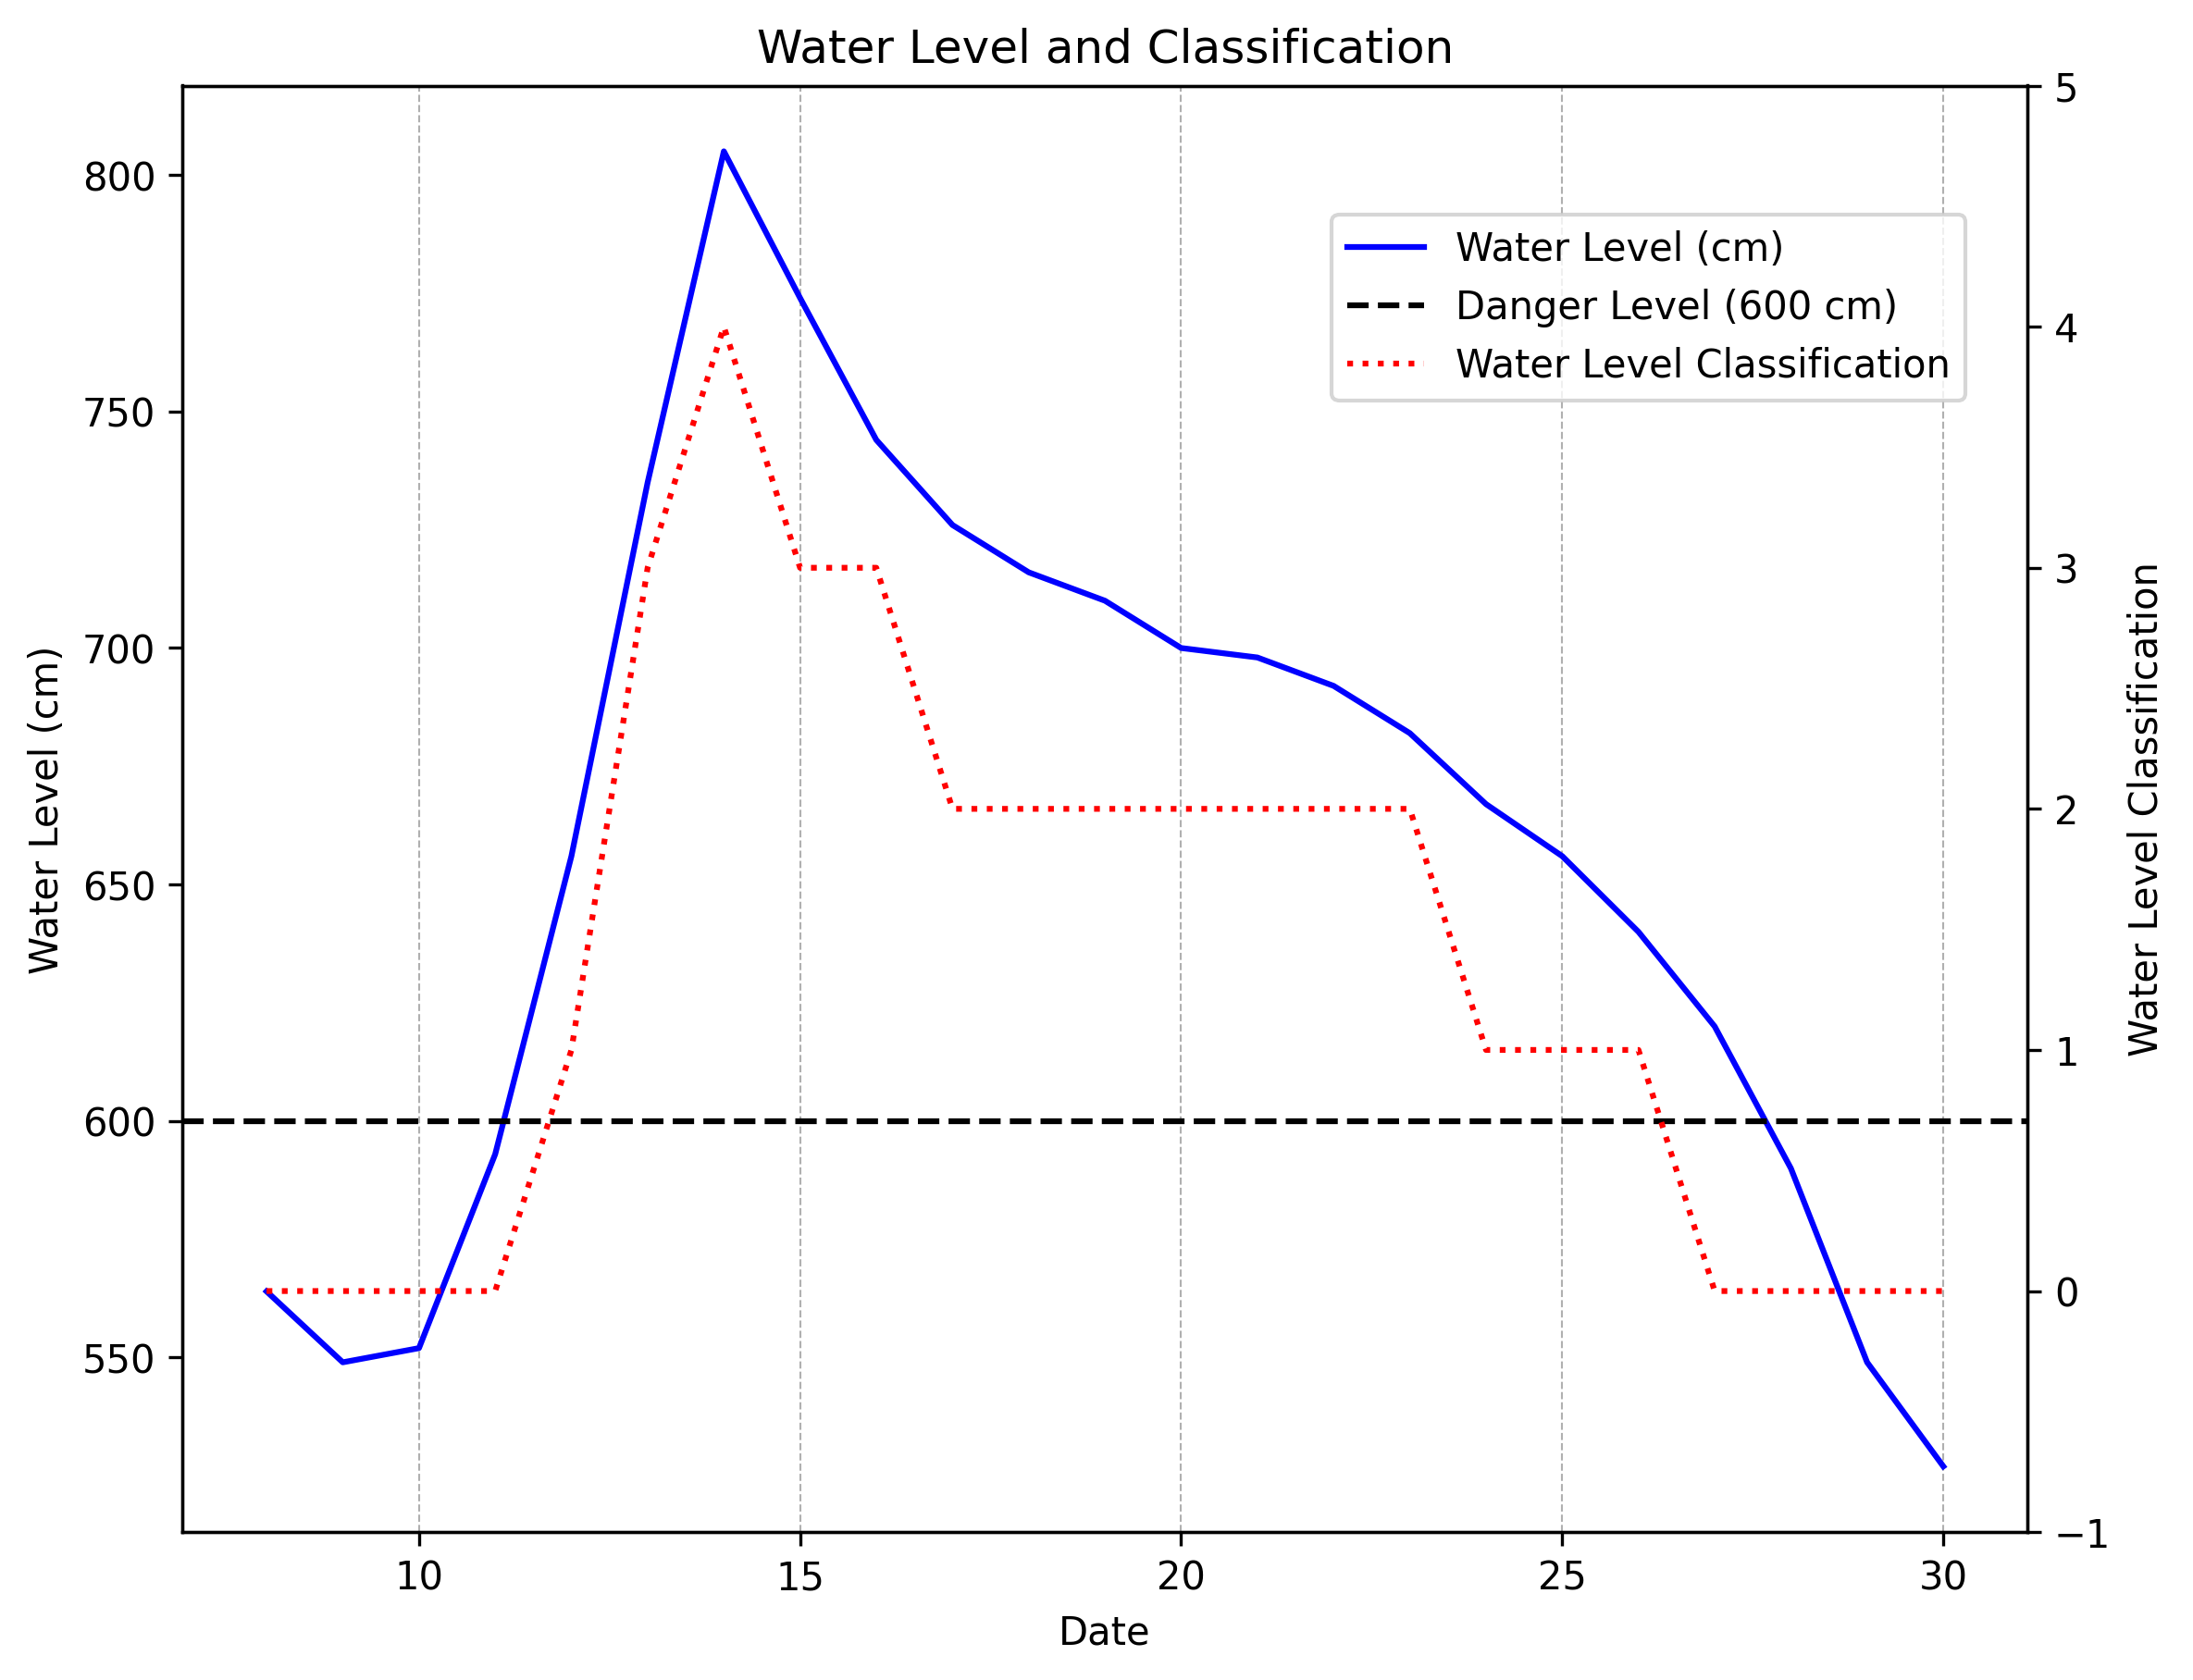

In [ ]:
plot_water_level(
    toungoo_df,
    danger_level,
    x,
    title="Water Level Classification for the Sittaung River at Taungoo",
)

# Route visualization
data collected from bla bla

In [15]:
from script.plot_route import create_route_plot

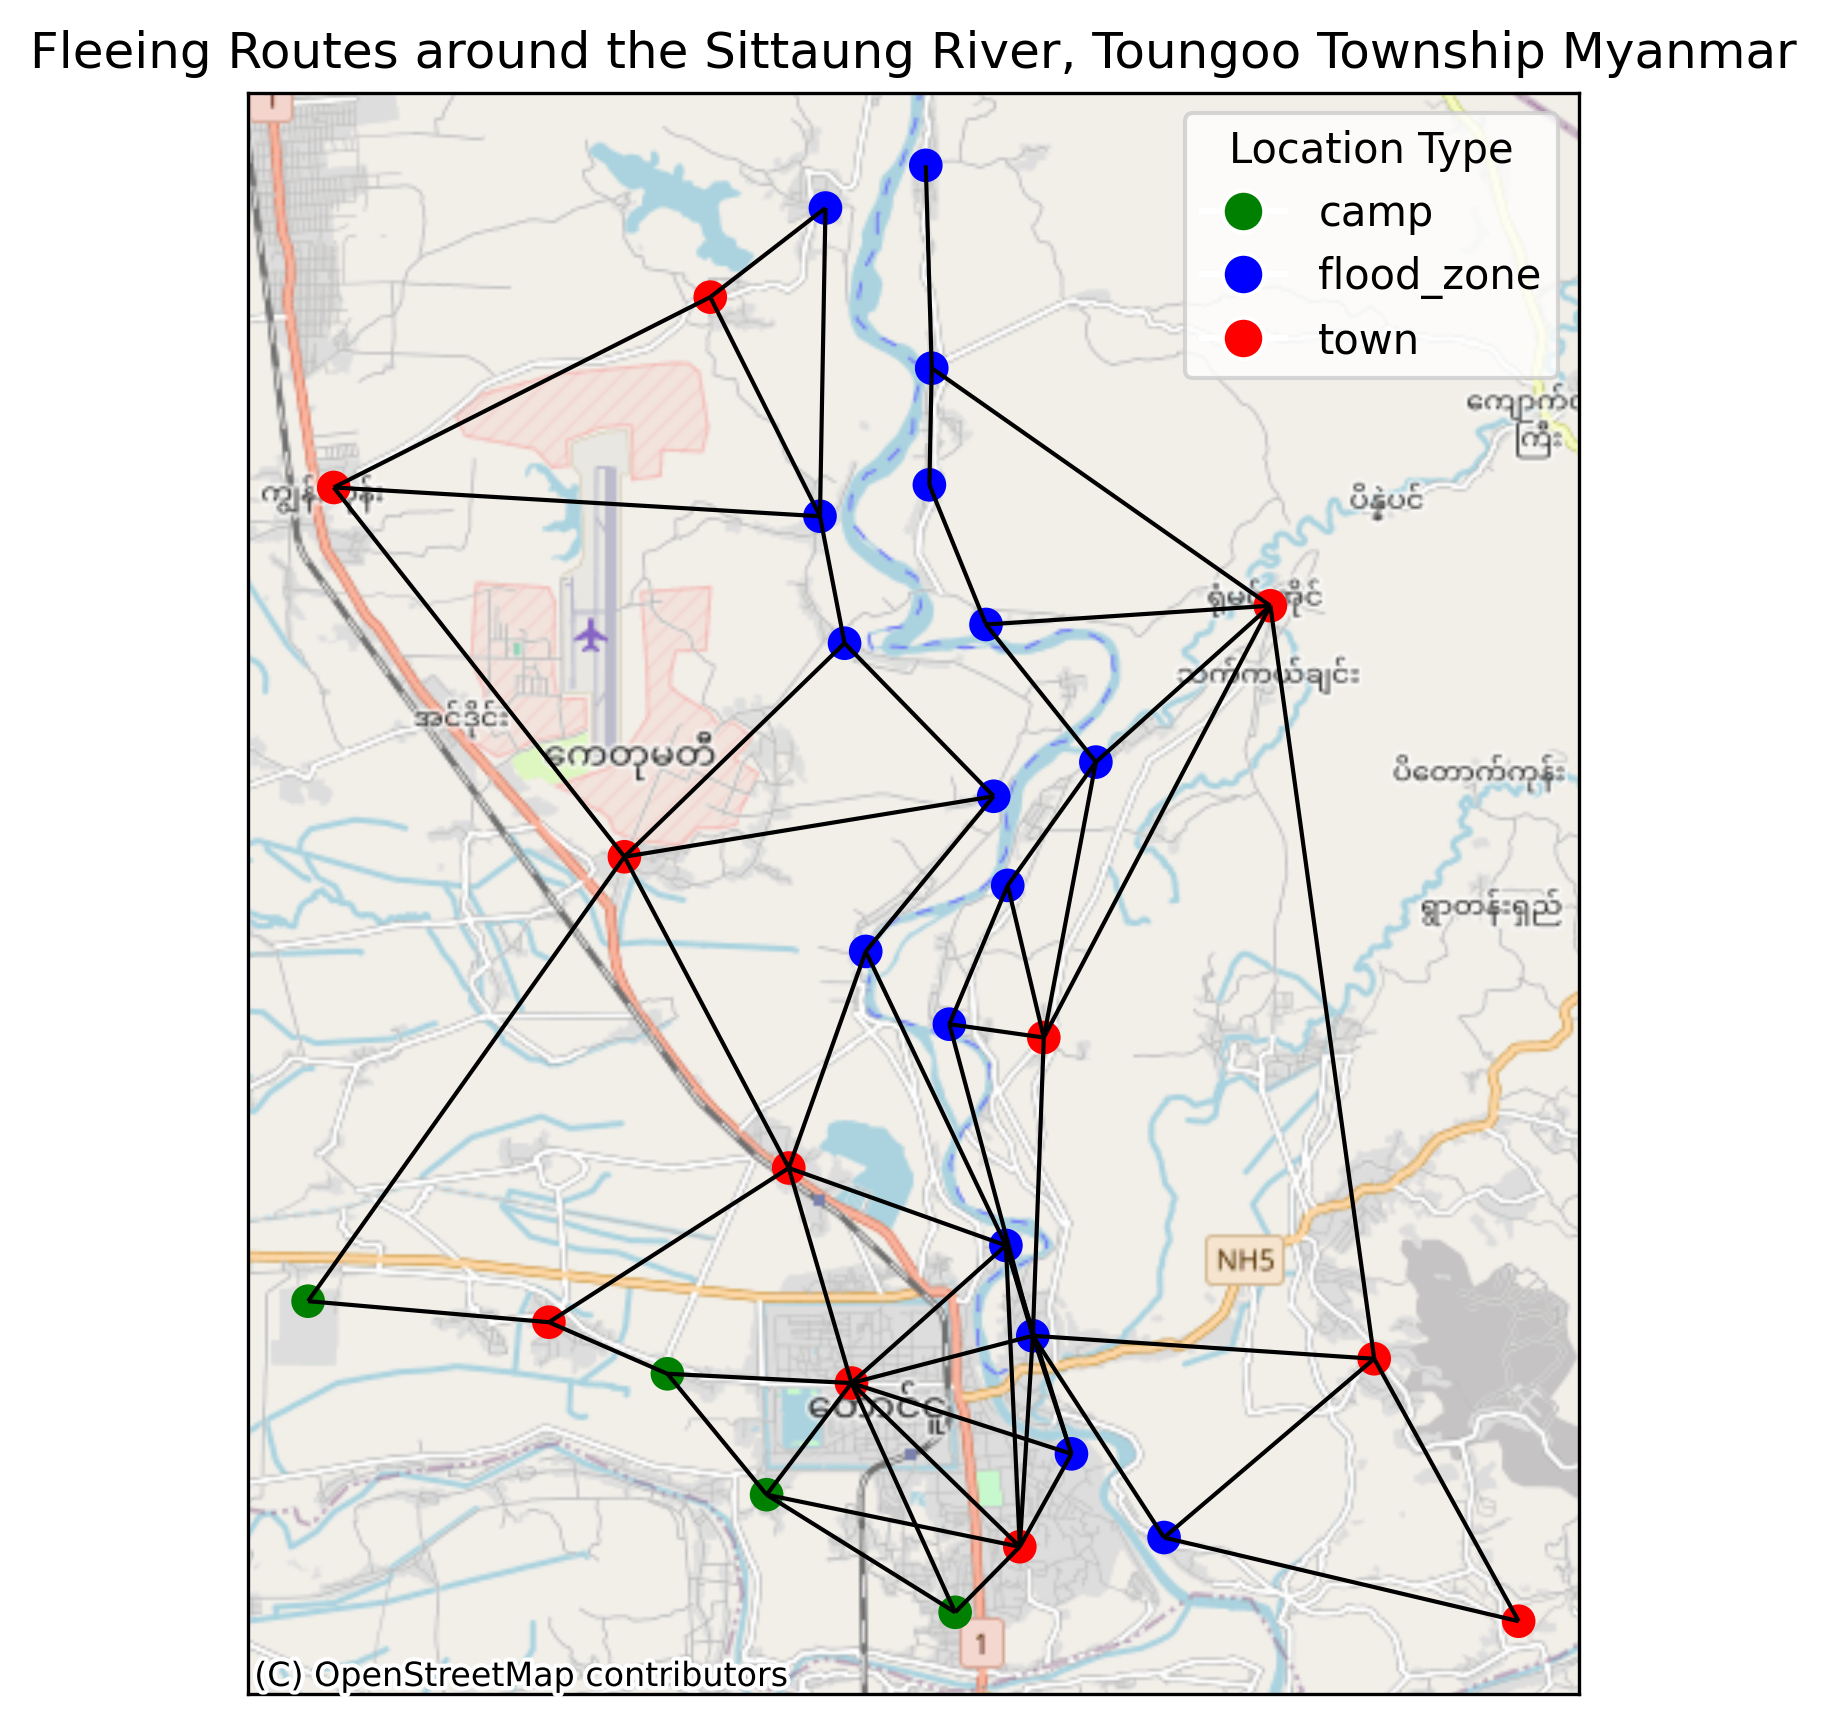

In [16]:
create_route_plot()

# Create config files for DFlee

In [ ]:
from src.create_config_files import append_coords, create_location_file

In [17]:
locations = pd.read_csv("data/Toungoo_Locations.csv")
locations.drop(columns=["description"], inplace=True)
locations.head()

,WKT,name
0,POINT (96.4302635 18.9436415),Town_1
1,POINT (96.4520608 18.9490161),Flood_Zone_1
2,POINT (96.4488261 18.9592898),Flood_Zone_2
3,POINT (96.4420314 18.9844455),Flood_Zone_3
4,POINT (96.4533819 18.9829274),Town_2


In [24]:
locations = append_coords(locations)
locations.head()

,name,longitude,latitude
0,Town_1,96.430263,18.943641
1,Flood_Zone_1,96.452061,18.949016
2,Flood_Zone_2,96.448826,18.959290
3,Flood_Zone_3,96.442031,18.984445
4,Town_2,96.453382,18.982927


In [ ]:
df = create_location_file(locations)
df.to_csv(PATH + "input_csv/locations.csv", index=False)